In [139]:
import numpy as np
import matplotlib.pyplot as plt
import oscullation as osc
import scipy.integrate as it
from scipy.signal import argrelextrema

We serve the computation of the corrections to the orbit of Mercury by the presence of Jupyter as an example of use of the code.

The orbital parameters of relevance are

e = 0.205628\
a= 0.387099 UA\
omega= 7&deg; 0' 15" = 0.1222 rad\
m1= 1\
m2=1/6010000

We assume that both Mercury and Jupyter share the same orbital plane and hence l=Omega=0

In [2]:
AU=1.495*10**11
Ms=1.98847*10**30
G=6.674*10**(-11)

e= 0.205628
a= 0.387099 *AU
m1=1
m2=1/6010000

In [3]:
merc=osc.orbit(omega=0, 
               Omega=0,
               l=0,
               e=e,
               a=a,
               m1=m1,
               m2=m2)



In [4]:
MJ=Ms/1047.39
RJ=5.202803*AU
Omega3=np.sqrt((G/RJ**3)*(m2*Ms+MJ))

In [5]:
def Wf():
    F=Omega3*merc.t
    return -G*MJ/(RJ**3)*merc.distance()*(1-3*np.cos(merc.f+merc.omega-F)**2)

def Sf():
    F=Omega3*merc.t
    return -3*G*MJ/(RJ**3)*merc.distance()*np.sin(merc.f+merc.omega-F)*np.cos(merc.f+merc.omega-F)
        

In [6]:
merc.set_force(Wf,Sf,None)

In [7]:
year=60*60*24*365

In [70]:
time=year
steps=10000
time_step=time/steps

In [71]:
merc.reset()
rs=np.array(merc.distance())
thetas=np.array(merc.omega+merc.f)
forc=np.array([merc.force()])
w=np.array(merc.omega)
fs=np.array(merc.f)

for step in range(steps):
    deltas=merc.time_step(time_step, deltas=1)
    rs=np.append(rs,merc.distance())
    thetas=np.append(thetas,merc.omega+merc.f)
    forc=np.append(forc,[merc.force()],0)
    w=np.append(w,merc.omega)
    fs=np.append(fs,merc.f)

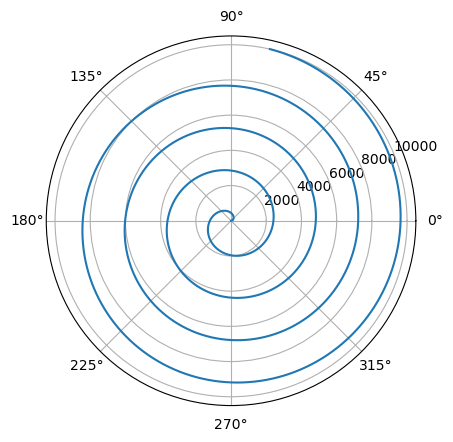

In [72]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
radii=np.arange(len(thetas))
ax.plot(thetas-thetas[0],radii)
plt.show()

In [73]:
period=[i for i,v in enumerate(thetas-thetas[0]) if v > 2*np.pi][0]
period=period*time_step/(3600)/24
print('The period is:',period, 'days') 

The period is: 87.892 days


In [261]:
time=year/365*period
steps=3000
time_step=time/steps

In [262]:
merc.reset()
rs=np.array(merc.distance())
thetas=np.array(merc.omega+merc.f)
forc=np.array([merc.force()])
w=np.array(merc.omega)
fs=np.array(merc.f)
deltaw=np.array(0)

for step in range(steps):
    deltas=merc.time_step(time_step, deltas=1)
    rs=np.append(rs,merc.distance())
    thetas=np.append(thetas,merc.omega+merc.f)
    forc=np.append(forc,[merc.force()],0)
    w=np.append(w,merc.omega)
    deltaw=np.append(deltaw,deltas['deltaomega'])
    fs=np.append(fs,merc.f)
        
    

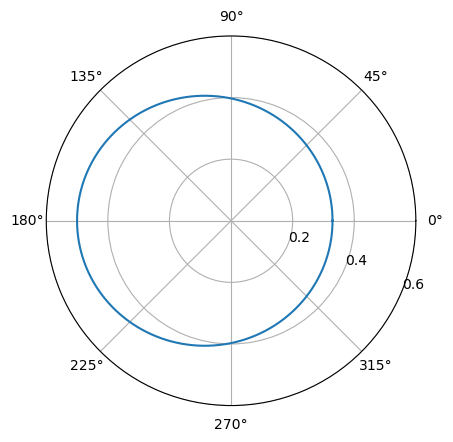

In [263]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(thetas, rs/(2*np.max(rs)))
ax.set_rmax(0.6)
ax.set_rticks([0.2, 0.4, 0.6])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

plt.show()